In [ ]:
# STROKE DATA ANALYSIS

In [67]:
# Importing Required Libraries

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [69]:
# Loading the Dataset 

In [70]:
df=pd.read_csv("stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [71]:
# Basic Information About the Dataset

In [72]:
df.shape

(5110, 12)

In [73]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [74]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [75]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [76]:
# Stroke Distribution by Gender

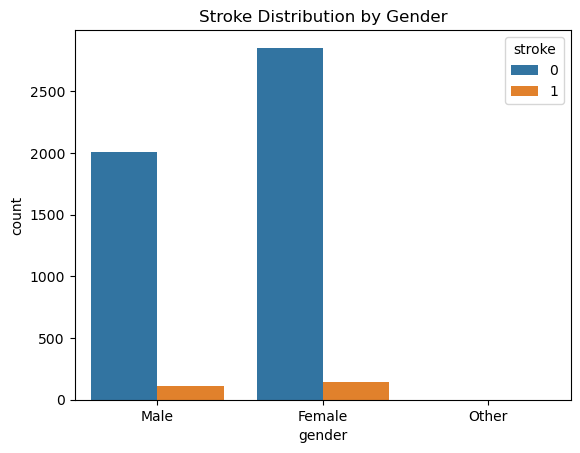

In [77]:
sns.countplot(x='gender', hue='stroke', data=df)
plt.title('Stroke Distribution by Gender')
plt.show()

In [78]:
# Slightly more females than males experienced strokes.

In [79]:
# Stroke Distribution by Age

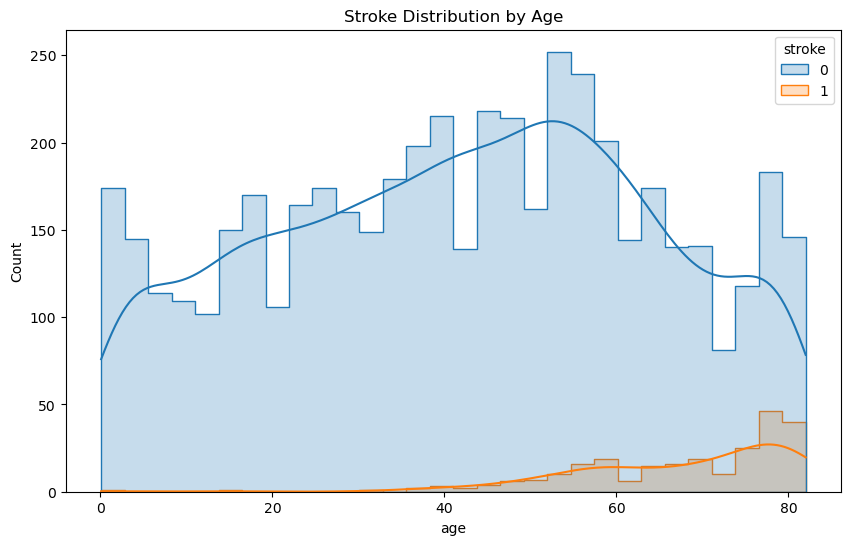

In [80]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='stroke', bins=30, kde=True, element='step')
plt.title('Stroke Distribution by Age')
plt.show()

In [81]:
# The histogram reveals that stroke incidence significantly increases with age. 
# Individuals aged 60 and above are at a notably higher risk.

In [82]:
# Stroke Rate by Work Type

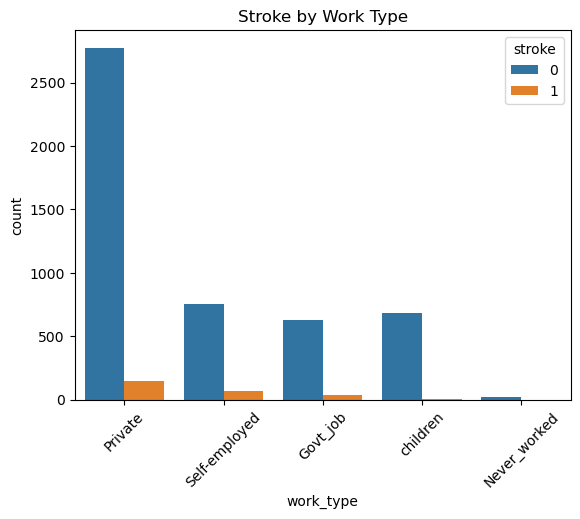

In [83]:
sns.countplot(x='work_type', hue='stroke', data=df)
plt.title('Stroke by Work Type')
plt.xticks(rotation=45)
plt.show()

In [84]:
# The highest stroke frequency is observed among individuals with private jobs and those who are self-employed. 
# Children and government job holders have comparatively fewer cases.

In [85]:
# checking correlation 

In [86]:
df.corr(numeric_only=True)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


<Axes: >

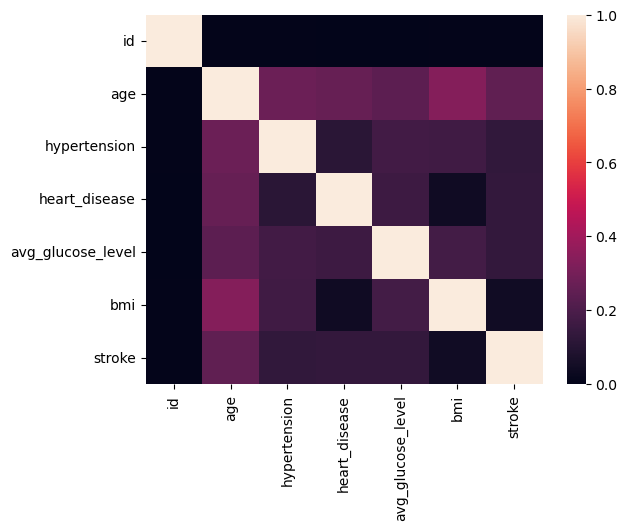

In [87]:
sns.heatmap(df.corr(numeric_only=True))

In [88]:
# here we can see id,bmi are not important so we can drop these numeric columns

In [89]:
from scipy.stats import chi2_contingency
for col in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']:
    table = pd.crosstab(df[col], df['stroke'])
    _, p, _, _ = chi2_contingency(table)
    print(f"{col}: p-value = {p:.4f} → {'Significant' if p < 0.05 else 'Not Significant'}")

gender: p-value = 0.7895 → Not Significant
ever_married: p-value = 0.0000 → Significant
work_type: p-value = 0.0000 → Significant
Residence_type: p-value = 0.2983 → Not Significant
smoking_status: p-value = 0.0000 → Significant


In [90]:
# here also we can drop gender, Residence_type from the dataset because they are not significant

In [91]:
# dropping irrelavant columns

In [92]:
df.drop(['id','bmi','gender','Residence_type'],axis=1,inplace=True)

In [93]:
df.dtypes

age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
avg_glucose_level    float64
smoking_status        object
stroke                 int64
dtype: object

In [94]:
# here we have 4 numeric and 3 object columns . So we have to encode the columns that contains object

In [95]:
# Checking for Missing Values

In [96]:
df.isna().sum()

age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
avg_glucose_level    0
smoking_status       0
stroke               0
dtype: int64

In [97]:
# there is no missing values in this dataset

In [98]:
# Checking Class Distribution (Target Imbalance)

<Axes: xlabel='stroke', ylabel='count'>

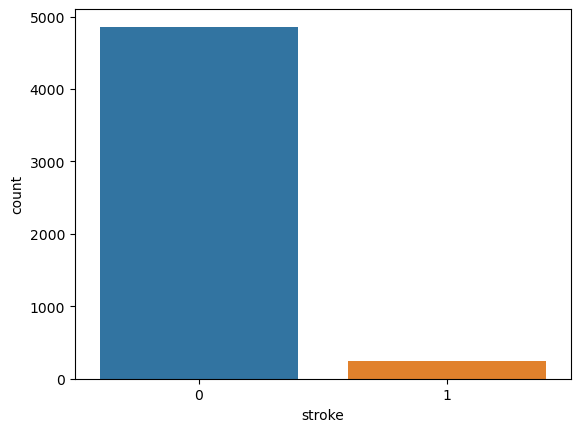

In [99]:
sns.countplot(x='stroke',data=df)

In [100]:
# the given dataset is an imbalanced one so we have to balance it

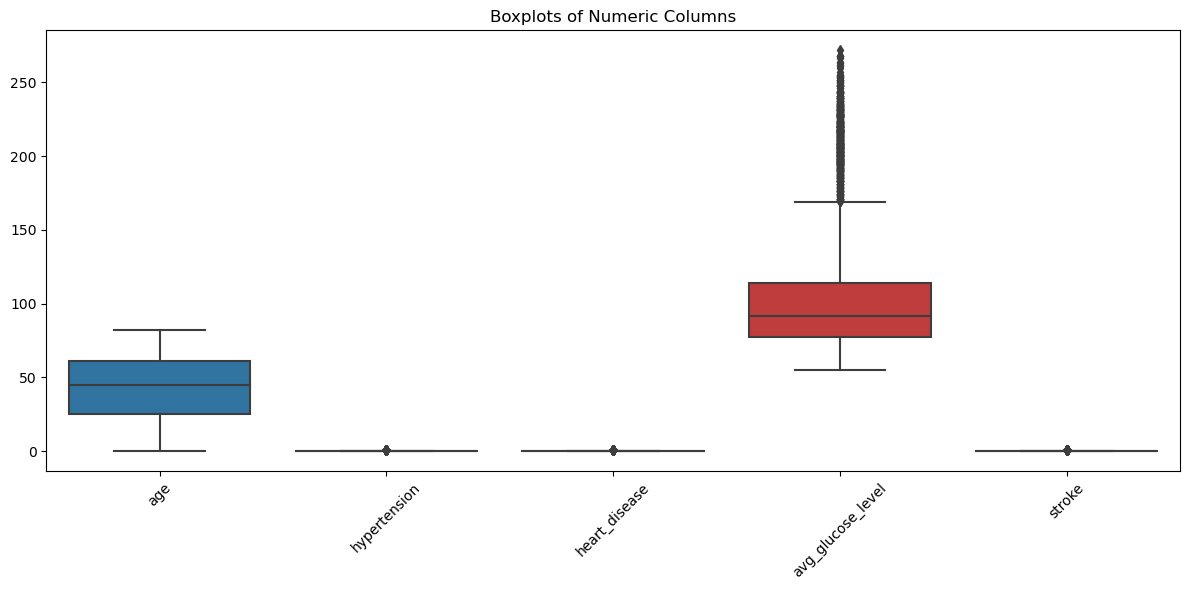

In [101]:
#checking outliers

plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=['number']))
plt.xticks(rotation=45)
plt.title('Boxplots of Numeric Columns')
plt.tight_layout()
plt.show()

In [102]:
outliers_dict = {}

for col in df.select_dtypes(include=['number']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    outliers_dict[col] = outliers.shape[0]  # or list of indices: outliers.index.tolist()

# Print count of outliers per column
for col, count in outliers_dict.items():
    print(f"{col}: {count} outliers")

age: 0 outliers
hypertension: 498 outliers
heart_disease: 276 outliers
avg_glucose_level: 627 outliers
stroke: 249 outliers


In [103]:
# removing outliers

for col in df.select_dtypes(include='number').columns:
    if col == 'stroke':
        continue  # skip the target column
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

In [104]:
# after doing previous step the outliers are removed

In [105]:
# Encoding Categorical Variables
# here we use get_dummies for encoding

In [106]:
dfe=pd.get_dummies(df[['ever_married','work_type','smoking_status']],drop_first=True,dtype=int)
dfe

,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
7,0,0,1,0,0,0,1,0
8,1,0,1,0,0,0,0,0
9,1,0,1,0,0,0,0,0
12,1,0,1,0,0,0,0,1
18,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...
5103,0,0,1,0,0,0,0,0
5104,0,0,0,0,1,0,0,0
5106,1,0,0,1,0,0,1,0
5107,1,0,0,1,0,0,1,0


In [107]:
df = df.reset_index(drop=True)
dfe = dfe.reset_index(drop=True)

In [108]:
df_1 = pd.concat([df, dfe], axis=1)
df_1

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,smoking_status,stroke,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,69.0,0,0,No,Private,94.39,never smoked,1,0,0,1,0,0,0,1,0
1,59.0,0,0,Yes,Private,76.15,Unknown,1,1,0,1,0,0,0,0,0
2,78.0,0,0,Yes,Private,58.57,Unknown,1,1,0,1,0,0,0,0,0
3,54.0,0,0,Yes,Private,104.51,smokes,1,1,0,1,0,0,0,0,1
4,60.0,0,0,No,Private,89.22,never smoked,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3980,18.0,0,0,No,Private,82.85,Unknown,0,0,0,1,0,0,0,0,0
3981,13.0,0,0,No,children,103.08,Unknown,0,0,0,0,0,1,0,0,0
3982,81.0,0,0,Yes,Self-employed,125.20,never smoked,0,1,0,0,1,0,0,1,0
3983,35.0,0,0,Yes,Self-employed,82.99,never smoked,0,1,0,0,1,0,0,1,0


In [109]:
df_1.drop(['ever_married','work_type','smoking_status'],axis=1,inplace=True)
df_1

,age,hypertension,heart_disease,avg_glucose_level,stroke,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,69.0,0,0,94.39,1,0,0,1,0,0,0,1,0
1,59.0,0,0,76.15,1,1,0,1,0,0,0,0,0
2,78.0,0,0,58.57,1,1,0,1,0,0,0,0,0
3,54.0,0,0,104.51,1,1,0,1,0,0,0,0,1
4,60.0,0,0,89.22,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3980,18.0,0,0,82.85,0,0,0,1,0,0,0,0,0
3981,13.0,0,0,103.08,0,0,0,0,0,1,0,0,0
3982,81.0,0,0,125.20,0,1,0,0,1,0,0,1,0
3983,35.0,0,0,82.99,0,1,0,0,1,0,0,1,0


In [110]:
# now we split the dataset into input and output (x & y)

In [111]:
x=df_1.drop(['stroke'],axis=1).values
x

array([[69.,  0.,  0., ...,  0.,  1.,  0.],
       [59.,  0.,  0., ...,  0.,  0.,  0.],
       [78.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [81.,  0.,  0., ...,  0.,  1.,  0.],
       [35.,  0.,  0., ...,  0.,  1.,  0.],
       [44.,  0.,  0., ...,  0.,  0.,  0.]])

In [112]:
y=df['stroke'].values
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [113]:
# Balancing the dataset 

In [114]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

In [115]:
# Splitting the Dataset into Training and Testing Sets

In [116]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size=0.30,random_state=42)
x_train

array([[27.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [57.60535842,  0.        ,  0.        , ...,  0.30267921,
         0.        ,  0.        ],
       [76.72801226,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [32.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [63.72735482,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [55.85146533,  0.        ,  0.        , ...,  0.        ,
         0.62970693,  0.        ]])

In [117]:
x_test

array([[2.80000000e+01, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.87793652e+01, 0.00000000e+00, 0.00000000e+00, ...,
        7.79365170e-01, 2.20634830e-01, 0.00000000e+00],
       [5.77563923e+01, 0.00000000e+00, 0.00000000e+00, ...,
        9.39098067e-01, 0.00000000e+00, 6.09019331e-02],
       ...,
       [6.25477881e+01, 0.00000000e+00, 0.00000000e+00, ...,
        1.13052968e-01, 0.00000000e+00, 0.00000000e+00],
       [5.30000000e+01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [7.90882608e+01, 0.00000000e+00, 0.00000000e+00, ...,
        6.37246400e-01, 3.62753600e-01, 0.00000000e+00]])

In [118]:
y_train

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [119]:
y_test

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [120]:
# Normalization

In [121]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [122]:
# Model Training: KNeighbors, naive_bayes, svm, DecisionTree, RandomForest

In [123]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
knn=KNeighborsClassifier(n_neighbors=7)
naive=BernoulliNB()
support=SVC()
tree=DecisionTreeClassifier()
forest=RandomForestClassifier()
lst=[knn,naive,support,tree,forest]

In [124]:
# Evaluating Model Performance (Confusion Matrix / Accuracy , classification report)

In [125]:
accuracies = []
for i in lst:
    i.fit(x_train, y_train)
    y_predict = i.predict(x_test)
    
    print("Performance evaluation of:", i)
    
    cm = confusion_matrix(y_test, y_predict)
    print("\nConfusion Matrix:\n", cm)
    
    acc = accuracy_score(y_test, y_predict)
    print("\nAccuracy Score:", acc)
    accuracies.append(acc)
    
    cr = classification_report(y_test, y_predict)
    print("\nClassification Report:\n", cr)
    
    print("=" * 100)


Performance evaluation of: KNeighborsClassifier(n_neighbors=7)

Confusion Matrix:
 [[1060  107]
 [  24 1134]]

Accuracy Score: 0.9436559139784946

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.91      0.94      1167
           1       0.91      0.98      0.95      1158

    accuracy                           0.94      2325
   macro avg       0.95      0.94      0.94      2325
weighted avg       0.95      0.94      0.94      2325

Performance evaluation of: BernoulliNB()

Confusion Matrix:
 [[825 342]
 [219 939]]

Accuracy Score: 0.7587096774193548

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.71      0.75      1167
           1       0.73      0.81      0.77      1158

    accuracy                           0.76      2325
   macro avg       0.76      0.76      0.76      2325
weighted avg       0.76      0.76      0.76      2325

Performance evaluation of: SVC

In [126]:
# graphical representation to select best model using accuracy score

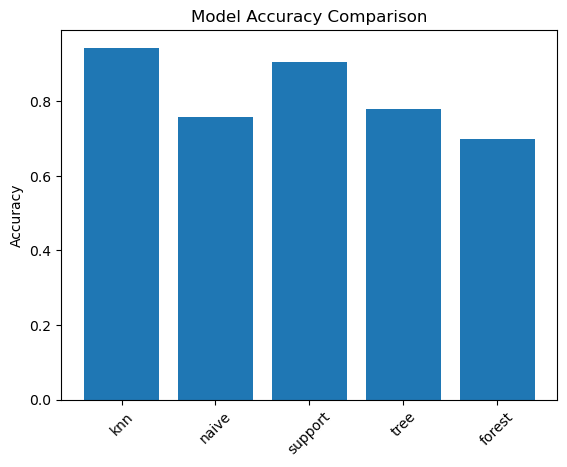

In [127]:
models=['knn','naive','support','tree','forest']
plt.bar(models, accuracies)
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.title('Model Accuracy Comparison')
plt.show()

In [128]:
# this shows that KNN is the best model

In [ ]:
# Randon value Prediction
# so to predict new person's condition we use KNN model because it has highest accuracy

In [132]:
print("Stroke Prediction:", "Stroke Likely (Positive)" if knn.predict(scaler.transform([
    [67, 0, 1, 228.69, 1, 0, 1, 0, 0, 1, 0, 0]]))[0] == 1 else "No Stroke (Negative)")

Stroke Prediction: No Stroke (Negative)
